In [50]:
import config
from cnn_builder import *
from dataset_functions import *
import gc
from hypercube_set import HypercubeSet
from hypercube_loader import *
import papers.aspn
import glob
import keras
import numpy as np
import os
import paths
import pickle
from rendering import *
import sys

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(os.getcwd().split("jupyter")[0])

%load_ext autoreload
%autoreload 2

inf = 2e32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
hc_set = HypercubeSet(hc_array=load_hypercubes(plot_hc=False, plot_mask=False, n_max_cubes=inf))
hc_set.print_metadata()

Reading media/Mateus_2022/white\raw_11888_rf.hdr ...
Reading media/Mateus_2022/white\raw_13040_rf.hdr ...
Reading media/Mateus_2022/white\raw_15040_rf.hdr ...
Reading media/Mateus_2022/white\raw_16064_rf.hdr ...
Reading media/Mateus_2022/white\raw_18064_rf.hdr ...
Reading media/Mateus_2022/white\raw_19008_rf.hdr ...
Reading media/Mateus_2022/white\raw_21008_rf.hdr ...
Reading media/Mateus_2022/white\raw_9888_rf.hdr ...
Min: 0.006211341358721256, Max: 0.15460343658924103, Size: (944, 5120, 223)


In [56]:
num_classes = hc_set.get_num_classes()
hc_set.swap_classes(0, num_classes - 1)

In [57]:
img_shape = (config.patch_size, config.patch_size, config.num_target_features)

X, y = hc_set.flatten()
X, y = remove_labels(X, y, [num_classes - 1])

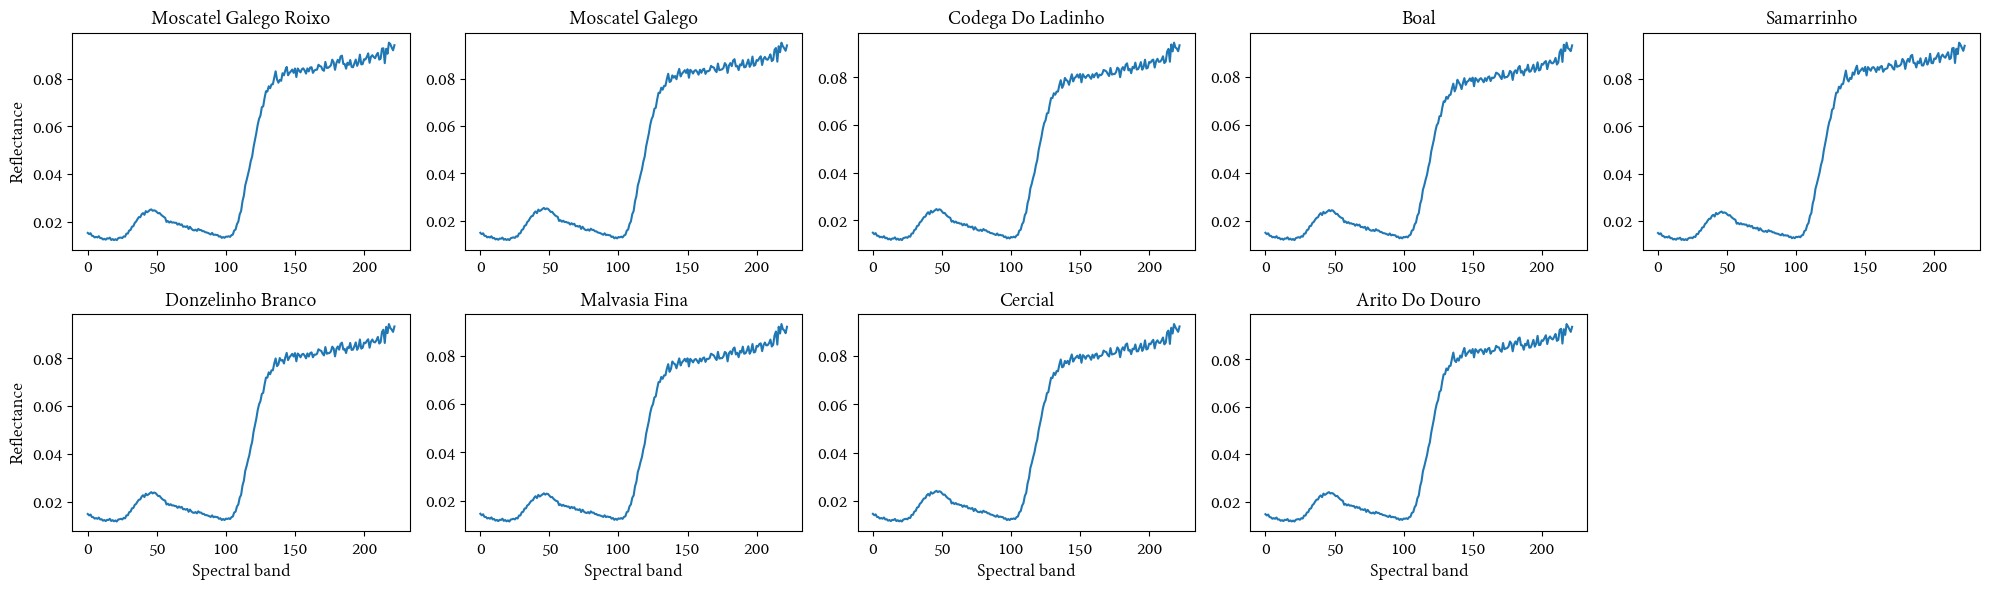

In [58]:
rendering.render_hc_spectrum_label(X, y)